In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import var, plot_implicit


In [116]:
def plotVectorField(f, xMin, xMax, yMin, yMax):
    fig = plt.gcf()
    fig.set_size_inches(12, 10)

    X = np.linspace(xMin, xMax, 64)
    Y = np.linspace(yMin, yMax, 64)
    
    XX, YY = np.meshgrid(X, Y)
    
    UU = np.cos(np.arctan(f(XX, YY)))
    VV = np.sin(np.arctan(f(XX, YY)))
    C = [[ f(x, y)*64 for x in X] for y in Y]
    plt.quiver(XX, YY, UU, VV, C, units='xy', width=0.01, scale=5)
    plt.title("Warmer color - higher speed")

1.1

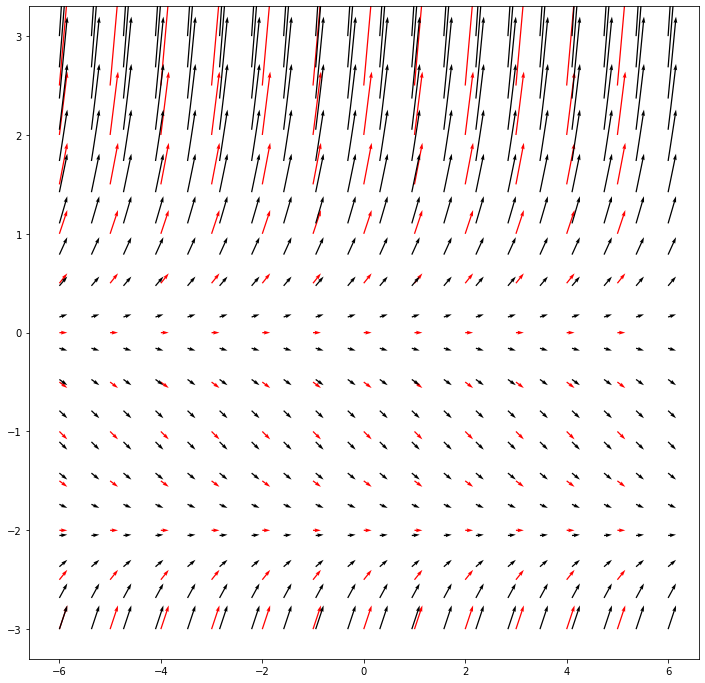

In [121]:
f = lambda x, y: y**2 + x     
fig = plt.figure(figsize=(12, 12))        

X, Y = np.meshgrid(np.arange(-6, 6), np.arange(-6, 6) / 2)

X = np.arange(-6, 6)
Y = np.arange(-6, 6) / 2

U = [1 for _ in range(len(X))]
V = f(X,Y)

XX, YY = np.meshgrid(X, Y)
UU, VV = np.meshgrid(U, V)

plt.quiver(XX, YY, UU, VV, color='red', units='xy', width=0.02, scale=8)

X = np.linspace(-6, 6, 20)
Y = np.linspace(-3, 3, 20)

U = [1 for _ in range(20)]
V = f(X,Y)

XX, YY = np.meshgrid(X, Y)
UU, VV = np.meshgrid(U, V)

plt.quiver(XX, YY, UU, VV, units='xy', width=0.02, scale=8)

plt.show()

1.2

To describe all the maximums we need to solve the equation with condition$$y' = f(x, y) = 0,\quad  y'' = f'_x + f'_y f \le 0$$$$y^2 + x = 0, \quad   1 + 2y(y^2  + x) \le 0$$$$y = \pm \sqrt{ - x}, \quad  -1 \cdot (\frac{1}{2y} + y^2) \le   x  \quad (1)$$

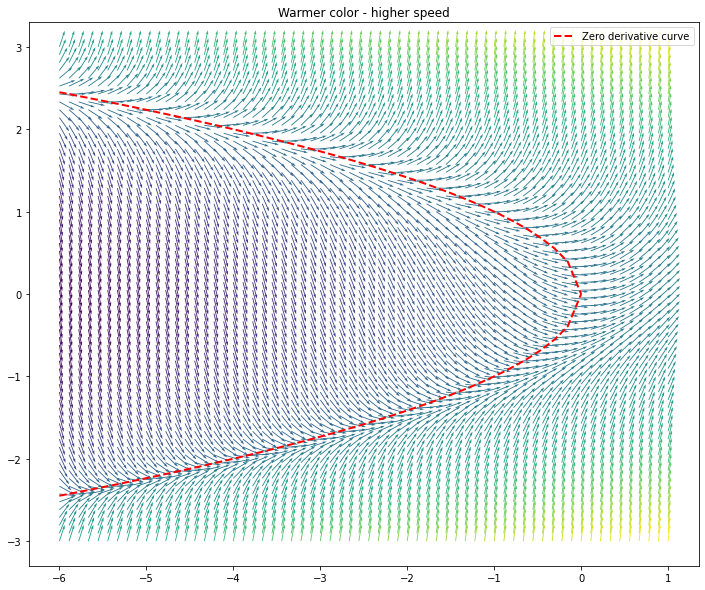

In [120]:
plotVectorField(f, -6, 1, -3, 3)

x = np.linspace(-6, 0, 40)
plt.plot(x, ( - x)**0.5, 'r--', linewidth=2, label='Zero derivative curve')
plt.plot(x, -( - x)**0.5, 'r--', linewidth=2)
plt.legend()
plt.show()


1.3

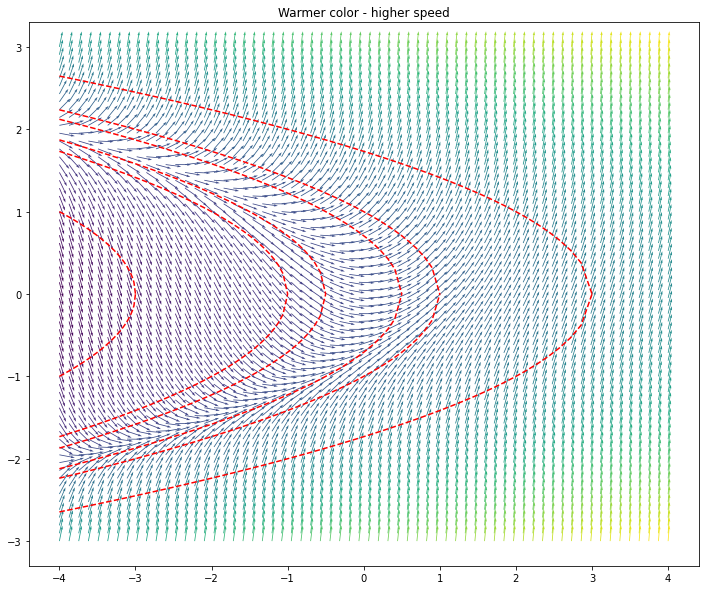

In [119]:
plotVectorField(f, -4, 4, -3, 3)

g = lambda x: (k - x)**0.5

vf = np.vectorize(g)

for k in [-3,-1,-0.5,0.5,1,3]:
    x = np.linspace(-4, k)
    y = vf(x)
    leg = "k=" + str(k)
    plt.plot(x, y, 'r--', label=leg)
    plt.plot(x, -y, 'r--')
plt.show()

1.4 , 1.5

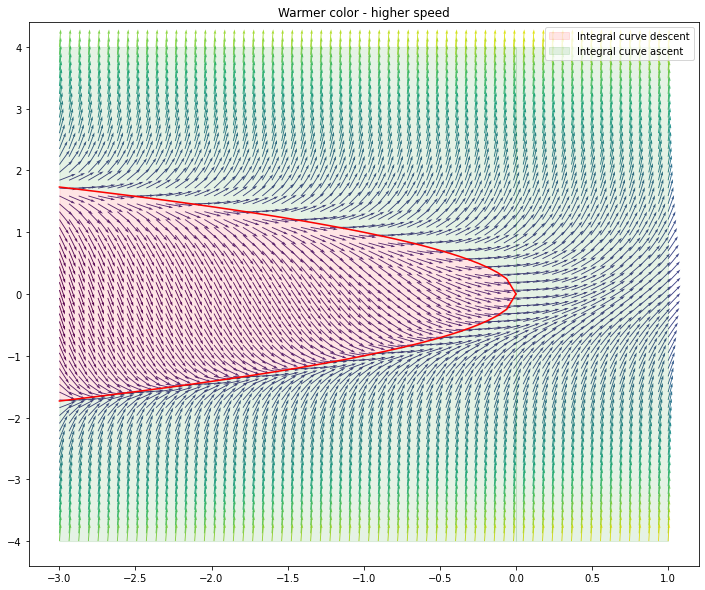

In [118]:
plotVectorField(f, -3, 1, -4, 4)

g = lambda x: ( - x)**0.5

g = np.vectorize(g)

x = np.linspace(-3, 0)
t = np.linspace(0, 1)
y1, y2 = g(x), -g(x)

plt.plot(x, y1, 'r')
plt.plot(x, y2, 'r')
area1 = plt.fill_between(x, y1, y2, alpha=0.1, color='r')
area2 = plt.fill_between(x, y1, 4, alpha=0.1, color='g')
plt.fill_between(x, -4, y2, alpha=0.1, color='g')
plt.fill_between(t, -4, 4, alpha=0.1, color='g')
plt.legend((area1, area2), ("Integral curve descent", "Integral curve ascent"))
plt.show()

3.6               $\qquad 2𝑦^{3}+2y𝑥+1=0$

C:\Users\v_mal\Anaconda3\lib\site-packages\sympy\plotting\plot.py:916: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
C:\Users\v_mal\Anaconda3\lib\site-packages\sympy\plotting\plot.py:917: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)
C:\Users\v_mal\Anaconda3\lib\site-packages\sympy\plotting\plot.py:956: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(False)
C:\Users\v_mal\Anaconda3\lib\site-packages\sympy\plotting\plot.py:957: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.a

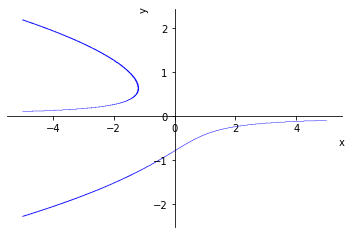

In [107]:
res = []
var('x y')
s = plot_implicit(2*y**3 + 2*x*y + 1).__dict__["_series"]
intervals = s[0].get_raster()[0]
for v in intervals:
    x, y = v[0].start, v[1].start
    res.append((x, y))

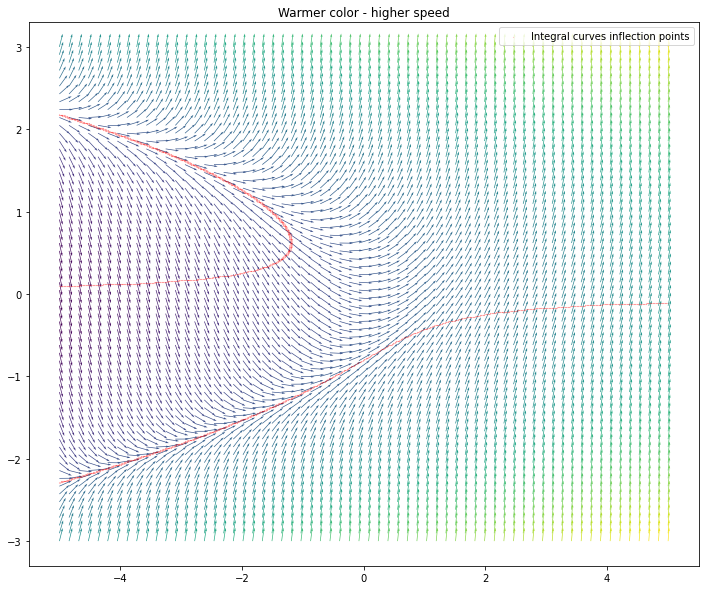

In [117]:

plotVectorField(f, -5, 5, -3, 3)

fig = plt.gcf()
fig.set_size_inches(12, 10)

X, Y = zip(*res)
line = plt.scatter(X, Y, c='r', s=0.005)
plt.legend((line, ), ("Integral curves inflection points",))
plt.show()

#  Task 2

2.1

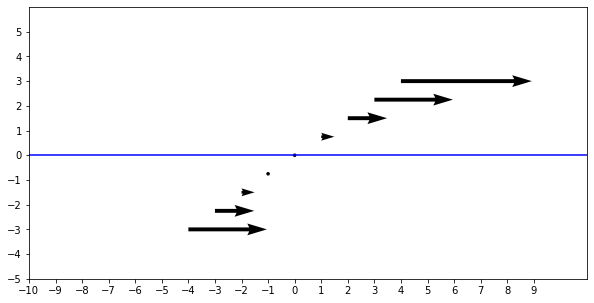

In [149]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
xticks = np.arange(-10, 10, 1)
yticks = np.arange(-5, 6, 1)
plt.axis((-10, 11, -5, 6))
ax = plt.gca()
ax.set_xticks(xticks)
ax.set_yticks(yticks)

b = lambda y:  y**2 + y

X = np.arange(-4, 5)
Y = np.linspace(-3, 3, 9)
XX, YY = np.meshgrid(X, Y)
V = [0 for i in range(-4, 5)]
U = [b(i) for i in range(-4, 5)]
plt.plot((-10, 11), (0, 0), 'b')
ax.quiver(X, Y, U, V, units='xy', width=0.15, scale=4)
plt.show()

2.2
